In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel("FlightPrice_All.xlsx",header=0)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [4]:
df.dropna(axis=0,inplace=True)

In [5]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  float64       
dtypes: datetime64[ns](3), float64(1), object(7)
memory usage: 1001.4+ KB


In [7]:
df.shape

(10682, 11)

In [8]:
df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

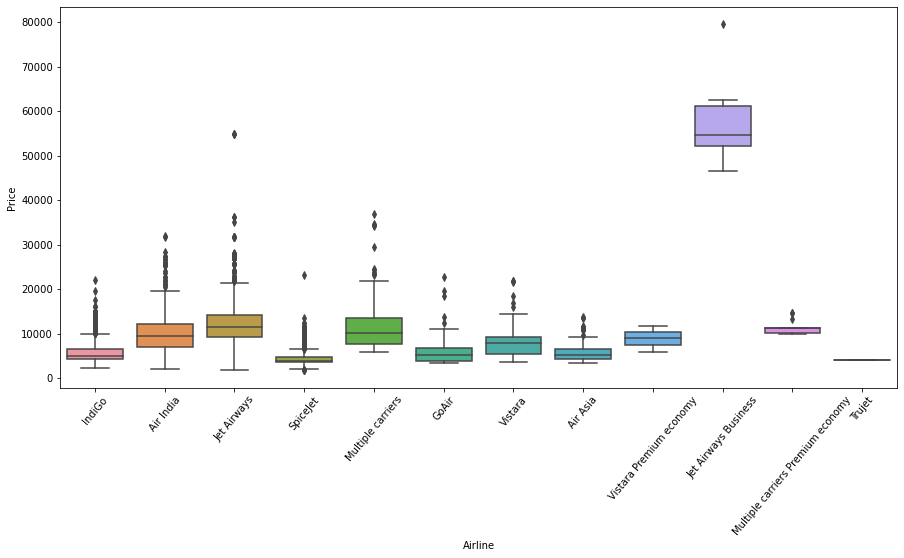

In [9]:
plt.figure(figsize=(15,7))
sns.boxplot(x=df['Airline'],y = df['Price'])
plt.xticks(rotation = 50)

In [10]:
flight_data = df.copy()

In [11]:
flight_data.drop('Additional_Info',axis=1,inplace=True)
flight_data.drop('Route',axis=1,inplace=True)

In [12]:
def hr_func(ts):
    return ts.hour

def min_func(ts):
    return ts.minute

In [13]:
flight_data['Dep_Hour'] = flight_data['Dep_Time'].apply(hr_func)
flight_data['Dep_Minute'] = flight_data['Dep_Time'].apply(min_func)

In [14]:
flight_data['Arrival_Hour'] = flight_data['Arrival_Time'].apply(hr_func)
flight_data['Arrival_Minute'] = flight_data['Arrival_Time'].apply(min_func)

In [15]:
flight_data['Journey_Weekday'] = flight_data['Date_of_Journey'].dt.dayofweek
#flight_data['Weekday_Journey'] = flight_data['Date_of_Journey'].apply(lambda x: x.weekday())
flight_data['Journey_Month'] = flight_data['Date_of_Journey'].dt.month
flight_data['Journey_Date'] = flight_data['Date_of_Journey'].dt.day

In [16]:
duration=list(flight_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   # Check if duration contains only hour
            duration[i]=duration[i] + ' 0m'      # Adds 0 minute
        else:
            duration[i]='0h '+ duration[i]       # if duration contains only second, Adds 0 hour

In [17]:
flight_data['Duration']=duration

In [18]:
def hour(x):
    return x.split(' ')[0][0:-1]

def min(x):
    return x.split(' ')[1][0:-1]

In [19]:
flight_data['Duration_hours']=flight_data['Duration'].apply(hour)
flight_data['Duration_mins']=flight_data['Duration'].apply(min)

In [20]:
flight_data.drop('Date_of_Journey',axis=1,inplace=True)
flight_data.drop('Arrival_Time',axis=1,inplace=True)
flight_data.drop('Dep_Time',axis=1,inplace=True)
flight_data.drop('Duration',axis=1,inplace=True)

In [21]:
flight_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [22]:
dict = {'1 stop' : 1, 'non-stop': 0, '2 stops' : 2, '3 stops' : 3, '4 stops' : 4}
flight_data['Total_Stops'] = flight_data['Total_Stops'].map(dict)

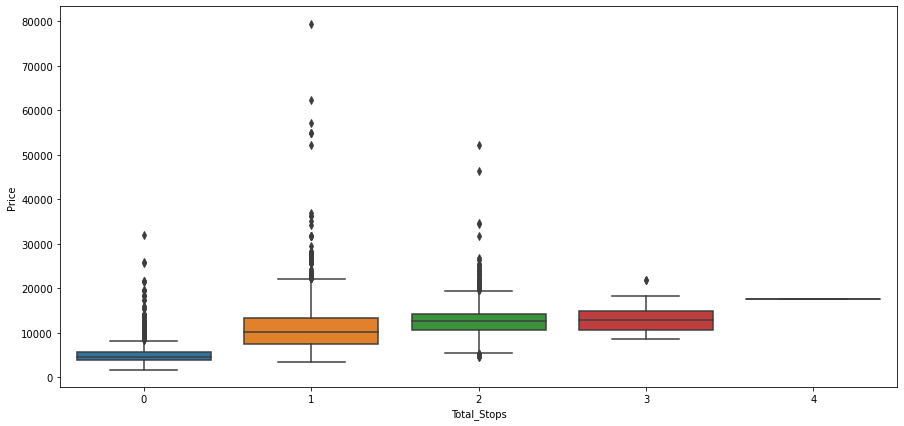

In [23]:
plt.figure(figsize=(15,7))
sns.boxplot(x=flight_data['Total_Stops'],y = flight_data['Price'])

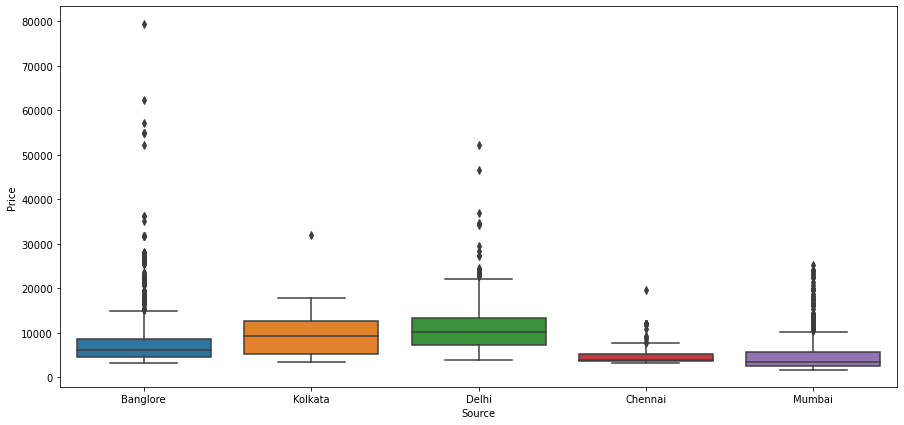

In [24]:
plt.figure(figsize=(15,7))
sns.boxplot(x=flight_data['Source'],y = flight_data['Price'])

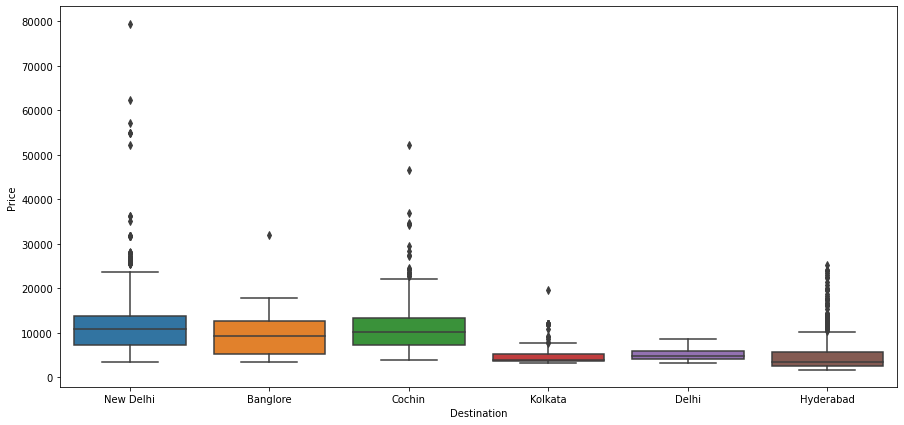

In [25]:
plt.figure(figsize=(15,7))
sns.boxplot(x=flight_data['Destination'],y = flight_data['Price'])

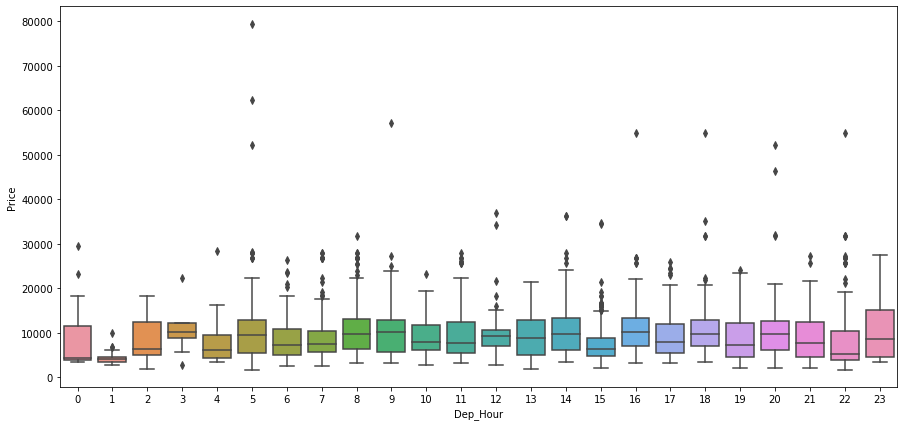

In [26]:
plt.figure(figsize=(15,7))
sns.boxplot(x=flight_data['Dep_Hour'],y=flight_data['Price'])

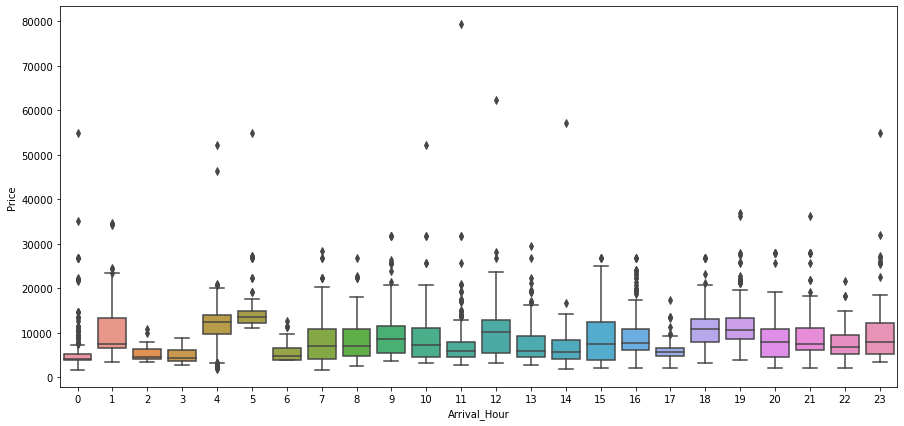

In [27]:
plt.figure(figsize=(15,7))
sns.boxplot(x=flight_data['Arrival_Hour'],y=flight_data['Price'])

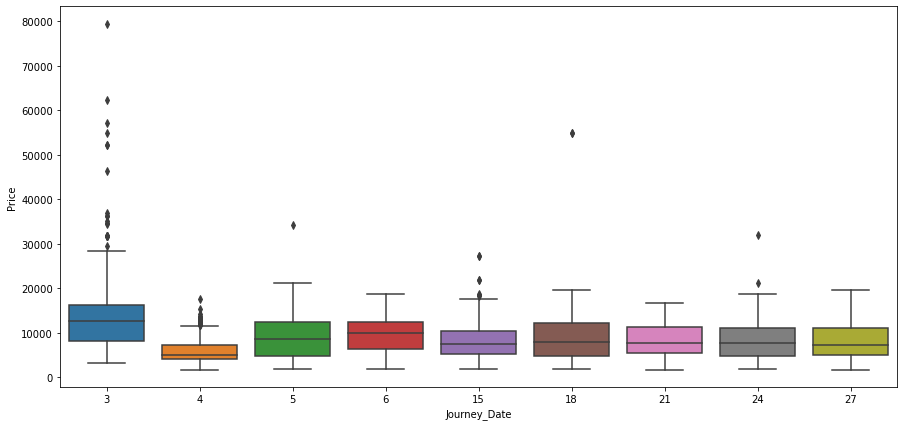

In [28]:
plt.figure(figsize=(15,7))
sns.boxplot(x=flight_data['Journey_Date'],y=flight_data['Price'])

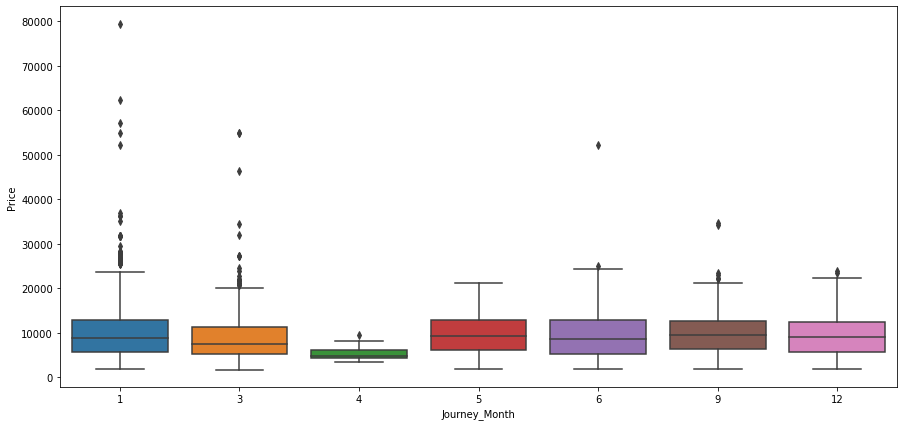

In [29]:
plt.figure(figsize=(15,7))
sns.boxplot(x=flight_data['Journey_Month'],y=flight_data['Price'])

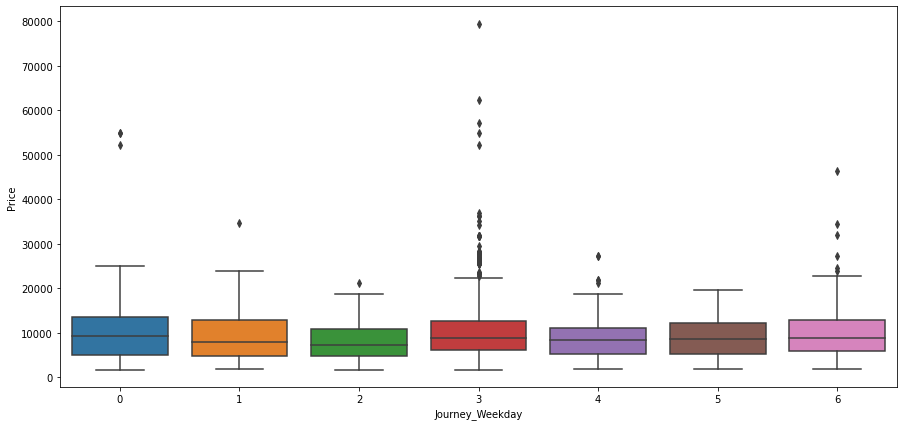

In [30]:
plt.figure(figsize=(15,7))
sns.boxplot(x=flight_data['Journey_Weekday'],y=flight_data['Price'])

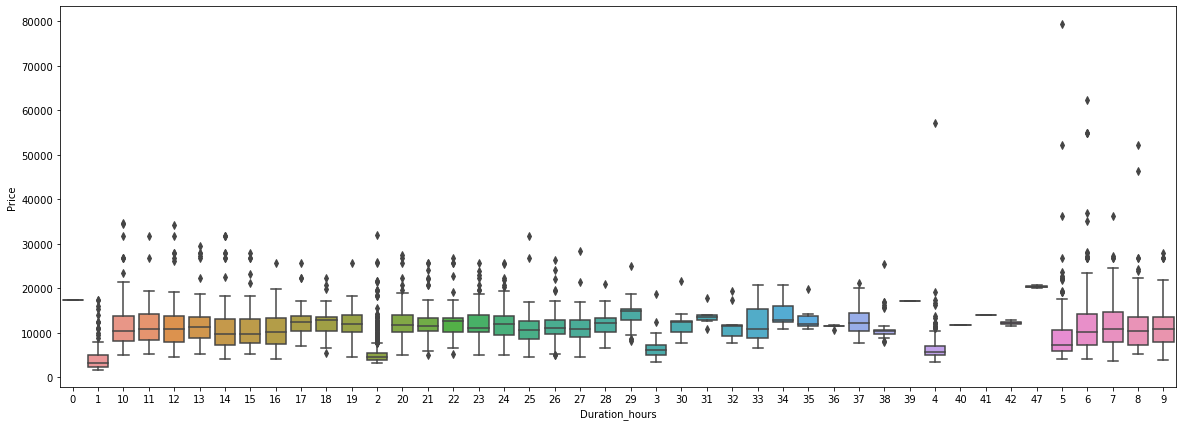

In [31]:
plt.figure(figsize=(20,7))
sns.boxplot(x=flight_data['Duration_hours'],y=flight_data['Price'])

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
one_hot_endcode = OneHotEncoder()
flight_data = pd.get_dummies(flight_data,columns=['Source','Destination','Airline'])

In [34]:
pd.set_option('display.max_columns',34)

In [35]:
flight_data.head()

,Total_Stops,Price,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Journey_Weekday,Journey_Month,Journey_Date,Duration_hours,Duration_mins,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,3897.0,22,20,1,10,6,3,24,2,50,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,2,7662.0,5,50,13,15,5,1,5,7,25,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,13882.0,9,25,4,25,4,9,6,19,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,6218.0,18,5,23,30,3,12,5,5,25,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,13302.0,16,50,21,35,3,1,3,4,45,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [36]:
X = flight_data.drop('Price',axis=1)
y = flight_data.Price

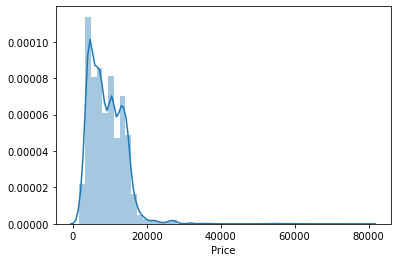

In [37]:
sns.distplot(y)

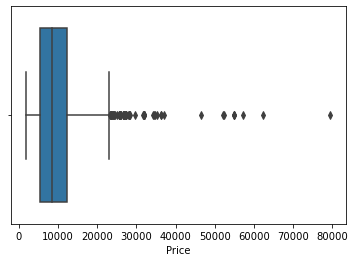

In [38]:
sns.boxplot(y)

In [39]:
X.head()

,Total_Stops,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Journey_Weekday,Journey_Month,Journey_Date,Duration_hours,Duration_mins,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,22,20,1,10,6,3,24,2,50,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,2,5,50,13,15,5,1,5,7,25,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,9,25,4,25,4,9,6,19,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,18,5,23,30,3,12,5,5,25,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,16,50,21,35,3,1,3,4,45,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


## Model 1_Full Model

In [40]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state = 2)
print('X train Shape:',X_train1.shape)
print('X test Shape:',X_test1.shape)
print('y train Shape:',y_train1.shape)
print('y test Shape:',y_test1.shape)

X train Shape: (8545, 33)
X test Shape: (2137, 33)
y train Shape: (8545,)
y test Shape: (2137,)


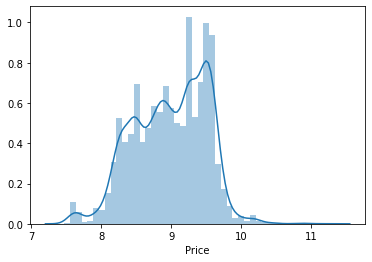

In [108]:
sns.distplot(y_train1)

In [41]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train1 = scale.fit_transform(X_train1)
X_test1 = scale.fit_transform(X_test1)
y_train1 = np.log(y_train1)
y_test1 = np.log(y_test1)

In [42]:
X_train1 = sm.add_constant(X_train1)

In [43]:
model1 = sm.OLS(y_train1,X_train1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     893.1
Date:                Wed, 19 May 2021   Prob (F-statistic):               0.00
Time:                        17:45:56   Log-Likelihood:                -949.72
No. Observations:                8545   AIC:                             1951.
Df Residuals:                    8519   BIC:                             2135.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9847      0.003   3066.680      0.0

C:\Users\Venkatesh.DESKTOP-836KGPI\anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Venkatesh.DESKTOP-836KGPI\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
MLR1 = LinearRegression()

In [46]:
MLR1.fit(X_train1,y_train1)

LinearRegression()

In [47]:
MLR1.coef_

array([-5.06250552e+06,  1.93597352e-01,  3.29787240e-03, -2.69620242e-03,
       -6.93994995e-04,  6.45223154e-03, -5.43402579e-03, -1.59143099e-02,
       -6.43144007e-02,  9.52026658e-03, -5.53543282e-04,  2.05183989e+10,
        4.69516543e+10,  2.03298210e+10,  1.00127070e+11,  1.08089240e+10,
       -3.78880129e+10,  4.85440308e+10,  2.87984095e+10,  2.37213594e+10,
       -2.09830416e+10,  2.46210217e+10,  2.64512983e+10,  5.66750391e+10,
        2.05409211e+10,  6.06611083e+10,  7.35403695e+10,  3.71036346e+09,
        4.81199555e+10,  4.69245538e+09,  4.14128994e+10,  0.00000000e+00,
        3.18256997e+10,  2.34705203e+09])

In [48]:
MLR1.intercept_

5062514.50734008

In [49]:
from sklearn.metrics import mean_squared_error,r2_score

In [50]:
error1 = mean_squared_error(y_train1,MLR1.predict(X_train1))
error1

0.07312454460034634

In [51]:
r2_score1 = r2_score(y_train1,MLR1.predict(X_train1))
r2_score1

0.7238299818650015

In [52]:
MLR1.score(X_train1,y_train1)

0.7238299818650015

## Model 2_RFECV

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

In [62]:
model2 = LinearRegression()
rfecv = RFECV(model2 , step = 1, min_features_to_select = 20 , n_jobs = -1)
rfecv.fit(X_train1 , y_train1)

RFECV(estimator=LinearRegression(), min_features_to_select=20, n_jobs=-1)

In [64]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [56]:
rfecv.ranking_

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1])

In [57]:
selected_features = np.where(rfecv.support_)[0]
X_train1 = X_train1[:,selected_features]
#X_test1 = X_test1[:,selected_features]

In [58]:
model2.fit(X_train1,y_train1)

LinearRegression()

In [59]:
model2.intercept_

13027971.746326836

In [60]:
model2.coef_

array([-1.30279628e+07,  1.96947172e-01,  4.94221043e-03, -3.76221924e-03,
        5.22954555e-03, -5.73118710e-03, -1.66107291e-02, -6.37854300e-02,
        9.46999426e-03, -2.28316130e+12, -9.21992661e+11, -2.58161126e+12,
       -1.36865938e+12, -8.66909039e+11, -1.58968186e+12, -6.92094445e+11,
       -3.14729719e+11, -7.74381269e+11, -3.12345093e+11, -2.69076223e+11,
        6.23680250e+10,  1.33630879e+11,  4.84322797e+10,  1.43029407e+11,
        1.73396691e+11,  8.74845682e+09,  1.13459330e+11,  1.10640760e+10,
        9.76451408e+10,  7.50400232e+10,  5.53398167e+09])

In [61]:
r2_score(y_train1,model2.predict(X_train1))

0.7237400996314127

## Model 3_Using PCA

In [65]:
from sklearn.decomposition import PCA

In [97]:
pca = PCA(n_components=20)

In [98]:
X_train3 = pca.fit_transform(X_train1)
#X_test3 = pca.transform(X_test1)

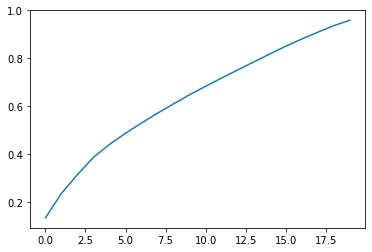

In [99]:
plt.plot(pca.explained_variance_ratio_.cumsum())

In [100]:
model3 = LinearRegression()

In [101]:
model3.fit(X_train3,y_train1)

LinearRegression()

In [102]:
model3.coef_

array([ 0.15608705,  0.09448384, -0.08512784,  0.02471033,  0.11520151,
       -0.05010017, -0.01085693, -0.0456706 ,  0.00476958,  0.03307324,
        0.05428002,  0.04237043, -0.01086849,  0.00740661,  0.02910737,
       -0.02327615, -0.01294596, -0.03879439, -0.0406888 , -0.06811277])

In [103]:
model3.intercept_

8.984745734168868

In [104]:
model3.score(X_train3,y_train1)

0.7032923220637322

## Model 4_K fold Validation

In [107]:
for train, test in kfold.split(data):
    print('train: %s, test: %s' % (data[train], data[test]))

NameError: name 'kfold' is not defined

In [106]:
from sklearn.model_selection import KFold 

k_fold = KFold(n_splits=10)

test_scores = []
for train_idx , test_idx in k_fold.split(X):
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]

    Xtest = X[test_idx]
    Ytest = Y[test_idx]

    model = LinearRegression()
    model.fit(Xtrain , Ytrain)

    test_scores.append(model.score(Xtest , Ytest))

KeyError: "None of [Int64Index([ 1069,  1070,  1071,  1072,  1073,  1074,  1075,  1076,  1077,\n             1078,\n            ...\n            10672, 10673, 10674, 10675, 10676, 10677, 10678, 10679, 10680,\n            10681],\n           dtype='int64', length=9613)] are in the [columns]"